In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
import numpy as np
import seaborn as sns
import os
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import scipy
import rasterio
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest as ztest
from PIL import Image
import geopandas as gpd
from osgeo import gdal

In [2]:
# Change the directory to where the data is stored
os.chdir('/Users/f67f911/Desktop/HG2022_Data/Data')

In [3]:
# Open the raster by date
sdepth_Nov24 = 'Sdepth_Rasters/Sdepth_Nov24.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Nov24) as src:
    # Read the raster data as a numpy array
    Nov24_data = src.read()
    # Specify the nan value 
    Nov24_data[Nov24_data == 3.3999999521443642e+38] = np.nan
    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_Nov24 = src.meta
    transform = src.transform
    Nov24_vals = Nov24_data.flatten()

In [4]:
# Convert the data to a dataframe to add more columns
Nov24_df = pd.DataFrame(Nov24_vals, columns = ['SnowDepth'])
Nov24_df['date'] = '20211124'
Nov24_df['SNOTEL'] = Nov24_df['SnowDepth']*0.161
Nov24_df['Manual'] = np.nan
Nov24_df[r'$\Delta$SNOW'] = Nov24_df['SnowDepth']*0.252
Nov24_df.head()

,SnowDepth,date,SNOTEL,Manual,$\Delta$SNOW
0,NaN,20211124,NaN,NaN,NaN
1,NaN,20211124,NaN,NaN,NaN
2,NaN,20211124,NaN,NaN,NaN
3,NaN,20211124,NaN,NaN,NaN
4,NaN,20211124,NaN,NaN,NaN


In [5]:
sdepth_Jan24 = 'Sdepth_Rasters/Sdepth_Jan24.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Jan24) as src:
    # Read the raster data as a numpy array
    Jan24_data = src.read()

    Jan24_data[Jan24_data == 3.3999999521443642e+38] = np.nan
    Jan24_vals = Jan24_data.flatten()

In [6]:
# Convert the data to a dataframe to add more columns
Jan24_df = pd.DataFrame(Jan24_vals, columns = ['SnowDepth'])
Jan24_df['date'] = '20220124'
# Create columns for the SWE
Jan24_df['SNOTEL'] = Jan24_df['SnowDepth']*0.290
Jan24_df['Manual'] = np.nan
Jan24_df[r'$\Delta$SNOW'] = Jan24_df['SnowDepth']*0.280

# This is exploration to make sure that snow depth was calculated correctly and multipled by the correct 
# densities in ArcGIS Pro. 
# They were, so I do not think I need to extract shapefiles of all of the manual measurement points at this time. 

In [8]:
# Extract point values from the shapefile for SnowDepth at each of the points.
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
pts = gpd.read_file('SWE_Compare/Measurement_Pts/Feb12/Feb12_SWE_Pts.shp')
# pts = pts[['UTM_E', 'UTM_N', 'Value', 'geometry']]
# pts.index = range(len(pts))
coords = [(x,y) for x, y in zip(pts.geometry.x, pts.geometry.y)]
src = rasterio.open('Sdepth_Rasters/Sdepth_Feb12.tif')
pts['Raster Value'] = [x for x in src.sample(coords)]

In [9]:
Nov24_val = pd.DataFrame()
Nov24_val['Manual'] = pts['Raster Value'] *0.340
Nov24_val['SNOTEL'] = pts['Raster Value'] *0.305
Nov24_val[r'$\Delta$SNOW'] = pts['Raster Value'] *0.304
Nov24_val

,Manual,SNOTEL,$\Delta$SNOW
0,[0.3951172],[0.35444337],[0.35328123]
1,[0.27608398],[0.24766359],[0.24685155]
2,[0.26114258],[0.23426026],[0.23349218]
3,[0.37552735],[0.33687013],[0.3357656]
4,[0.15314941],[0.13738404],[0.1369336]
5,[0.31875],[0.28593752],[0.285]
6,[0.21291505],[0.19099732],[0.19037108]
7,[0.30289552],[0.2717151],[0.27082422]
8,[0.38523927],[0.34558228],[0.34444922]
9,[0.30862305],[0.27685302],[0.2759453]


In [25]:
sdepth_Feb12 = 'Sdepth_Rasters/Sdepth_Feb12.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Feb12) as src:
    # Read the raster data as a numpy array
    Feb12_data = src.read()

    Feb12_data[Feb12_data == 3.3999999521443642e+38] = np.nan
    Feb12_vals = Feb12_data.flatten()

In [26]:
# Convert the data to a dataframe to add more columns
Feb12_df = pd.DataFrame(Feb12_vals, columns = ['SnowDepth'])
Feb12_df['date'] = '20220212'
# Create columns for the SWE
Feb12_df['SNOTEL'] = Feb12_df['SnowDepth']*0.305
Feb12_df['Manual'] = Feb12_df['SnowDepth']*0.335
Feb12_df[r'$\Delta$SNOW'] = Feb12_df['SnowDepth']*0.304

In [10]:
sdepth_Feb18 = 'Sdepth_Rasters/Sdepth_Feb18.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Feb18) as src:
    # Read the raster data as a numpy array
    Feb18_data = src.read()

    Feb18_data[Feb18_data == 3.3999999521443642e+38] = np.nan
    Feb18_vals = Feb18_data.flatten()

In [11]:
# Convert the data to a dataframe to add more columns
Feb18_df = pd.DataFrame(Feb18_vals, columns = ['SnowDepth'])
Feb18_df['date'] = '20220218'
# Create columns for the SWE
Feb18_df['SNOTEL'] = Feb18_df['SnowDepth']*0.301
Feb18_df['Manual'] = Feb18_df['SnowDepth']*0.248
Feb18_df[r'$\Delta$SNOW'] = Feb18_df['SnowDepth']*0.282

In [12]:
sdepth_Mar25 = 'Sdepth_Rasters/Sdepth_Mar25.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Mar25) as src:
    # Read the raster data as a numpy array
    Mar25_data = src.read()

    Mar25_data[Mar25_data == 3.3999999521443642e+38] = np.nan
    Mar25_vals = Mar25_data.flatten()

In [13]:
# Convert the data to a dataframe to add more columns
Mar25_df = pd.DataFrame(Mar25_vals, columns = ['SnowDepth'])
Mar25_df['date'] = '20220325'
# Create columns for the SWE
Mar25_df['SNOTEL'] = Mar25_df['SnowDepth']*0.35
Mar25_df['Manual'] = Mar25_df['SnowDepth']*0.274
Mar25_df[r'$\Delta$SNOW'] = Mar25_df['SnowDepth']*0.322

In [14]:
pts = gpd.read_file('SWE_Compare/Measurement_Pts/Mar25/Mar25_SWE_Pts.shp')
coords = [(x,y) for x, y in zip(pts.geometry.x, pts.geometry.y)]
src = rasterio.open('Sdepth_Rasters/Sdepth_Mar25.tif')
pts['Raster Value'] = [x for x in src.sample(coords)]

In [15]:
Mar25_val = pd.DataFrame()
Mar25_val['Manual'] = pts['Raster Value'] *0.274
Mar25_val['SNOTEL'] = pts['Raster Value'] *0.350
Mar25_val[r'$\Delta$SNOW'] = pts['Raster Value'] *0.322
Mar25_val

,Manual,SNOTEL,$\Delta$SNOW
0,[0.5061909],[0.6465942],[0.5948667]
1,[0.64145166],[0.81937253],[0.75382274]
2,[0.73162544],[0.9345581],[0.8597934]
3,[0.77952194],[0.99573976],[0.91608053]
4,[0.75042284],[0.95856935],[0.8818838]
5,[0.76219624],[0.9736084],[0.8957197]
6,[0.6125532],[0.7824585],[0.7198618]
7,[0.60599756],[0.77408445],[0.7121577]
8,[0.73583984],[0.9399414],[0.8647461]
9,[0.74895114],[0.9566894],[0.8801543]


In [16]:
sdepth_Apr07 = 'Sdepth_Rasters/Sdepth_Apr07.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Apr07) as src:
    # Read the raster data as a numpy array
    Apr07_data = src.read()

    Apr07_data[Apr07_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_Apr07 = src.meta
    transform = src.transform
    Apr07_vals = Apr07_data.flatten()

In [17]:
# Convert the data to a dataframe to add more columns
Apr07_df = pd.DataFrame(Apr07_vals, columns = ['SnowDepth'])
Apr07_df['date'] = '20220407'
# Create columns for the SWE
Apr07_df['SNOTEL'] = Apr07_df['SnowDepth']*0.371
Apr07_df['Manual'] = Apr07_df['SnowDepth']*0.379
Apr07_df[r'$\Delta$SNOW'] = Apr07_df['SnowDepth']*0.347

In [18]:
sdepth_May05 = 'Sdepth_Rasters/Sdepth_May05.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_May05) as src:
    # Read the raster data as a numpy array
    May05_data = src.read()

    May05_data[May05_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_May05 = src.meta
    transform = src.transform
    May05_vals = May05_data.flatten()

In [19]:
# Convert the data to a dataframe to add more columns
May05_df = pd.DataFrame(May05_vals, columns = ['SnowDepth'])
May05_df['date'] = '20220505'
# Create columns for the SWE
May05_df['SNOTEL'] = May05_df['SnowDepth']*0.389
May05_df['Manual'] = May05_df['SnowDepth']*0.419
May05_df[r'$\Delta$SNOW'] = May05_df['SnowDepth']*0.362

In [20]:
sdepth_May10 = 'Sdepth_Rasters/Sdepth_May10.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_May10) as src:
    # Read the raster data as a numpy array
    May10_data = src.read()

    May10_data[May10_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_May10 = src.meta
    transform = src.transform
    May10_vals = May10_data.flatten()

In [21]:
# Convert the data to a dataframe to add more columns
May10_df = pd.DataFrame(May10_vals, columns = ['SnowDepth'])
May10_df['date'] = '20220510'
# Create columns for the SWE and multiply the snow depth by the density values for each approach
May10_df['SNOTEL'] = May10_df['SnowDepth']*0.386
May10_df['Manual'] = May10_df['SnowDepth']*0.363
May10_df[r'$\Delta$SNOW'] = May10_df['SnowDepth']*0.361

In [22]:
sdepth_May17 = 'Sdepth_Rasters/Sdepth_May17.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_May17) as src:
    # Read the raster data as a numpy array
    May17_data = src.read()

    May17_data[May17_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_May17 = src.meta
    transform = src.transform
    May17_vals = May17_data.flatten()

In [23]:
# Convert the data to a dataframe to add more columns
May17_df = pd.DataFrame(May17_vals, columns = ['SnowDepth'])
May17_df['date'] = '20220517'
# Create columns for the SWE
May17_df['SNOTEL'] = May17_df['SnowDepth']*0.409
May17_df['Manual'] = May17_df['SnowDepth']*0.401
May17_df[r'$\Delta$SNOW'] = May17_df['SnowDepth']*0.420

In [27]:
# Create a merged dataframe of all the important information for each date
merged = pd.concat([Nov24_df, Jan24_df, Feb12_df, Feb18_df, Mar25_df, Apr07_df, May05_df, May10_df, May17_df], axis = 0)
merged.head()

,SnowDepth,date,SNOTEL,Manual,$\Delta$SNOW
0,NaN,20211124,NaN,NaN,NaN
1,NaN,20211124,NaN,NaN,NaN
2,NaN,20211124,NaN,NaN,NaN
3,NaN,20211124,NaN,NaN,NaN
4,NaN,20211124,NaN,NaN,NaN


In [28]:
merged['label'] = pd.to_datetime(merged['date']).dt.strftime('%b %d')

In [29]:
# Create a new dataframe by melting the merged dataframe for plotting purposes
plotting_df = pd.melt(merged,id_vars = ['label'],value_vars = ['Manual','SNOTEL',r'$\Delta$SNOW'])
plotting_df.head()

,label,variable,value
0,Nov 24,Manual,NaN
1,Nov 24,Manual,NaN
2,Nov 24,Manual,NaN
3,Nov 24,Manual,NaN
4,Nov 24,Manual,NaN


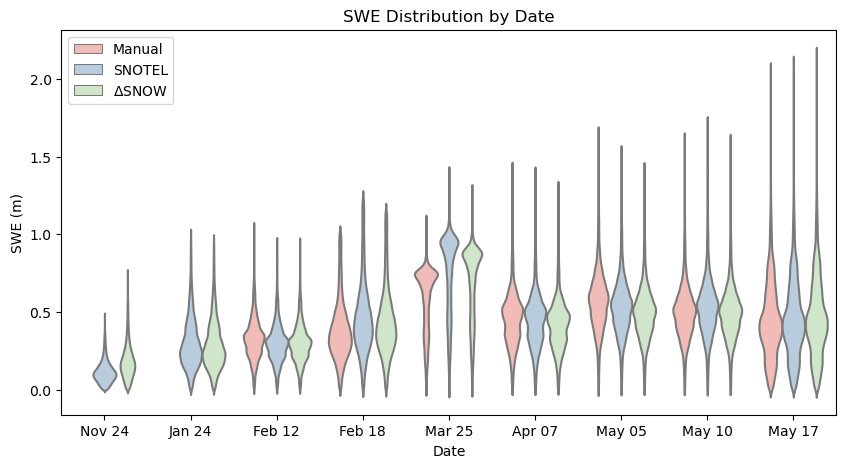

In [30]:
# Create a figure showing SWE values for the entire field site for each day
fig, ax = pyplot.subplots(figsize=(10,5))
sns.violinplot(data = plotting_df, x = plotting_df['label'], y = plotting_df['value'], hue = plotting_df['variable'],
               palette = "Pastel1", showfliers = False, inner = None, ax = ax)
plt.legend(loc = 'upper left')
plt.title('SWE Distribution by Date')
plt.xlabel('Date')
plt.ylabel('SWE (m)')
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SWE_Dist.png', bbox_inches = "tight")

<Axes: xlabel='variable', ylabel='value'>

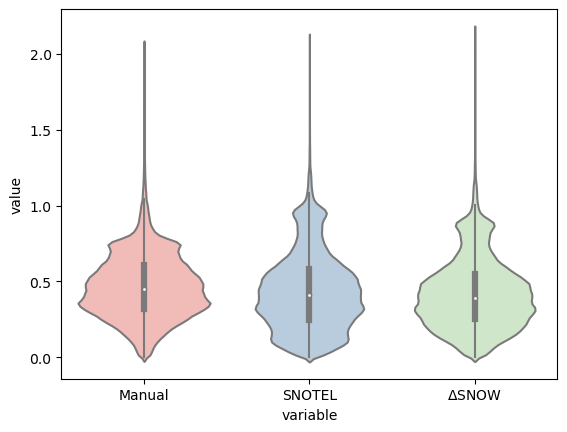

In [31]:
# Create the same visual but for each date aggregated together
sns.violinplot(data = plotting_df, x = plotting_df['variable'], y = plotting_df['value'],
               palette = "Pastel1", showfliers = False)